In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
import glob
from tqdm import tqdm
import seaborn as sb
%matplotlib inline

from makiflow import set_main_gpu

set_main_gpu(1)

In [2]:
images_path = glob.glob('/home/rustam/EyePit/datasets/eyes/imgs/*.bmp')

In [3]:
cv2.imread(images_path[0]).shape

(821, 1062, 3)

In [4]:
plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(cv2.imread(images_path[34]), cv2.COLOR_BGR2RGB))

In [5]:
masks_path = glob.glob('/home/rustam/EyePit/datasets/eyes/mask/*.bmp')

In [6]:
plt.figure(figsize=(10,10))
sb.heatmap(cv2.imread(masks_path[0])[..., 0])
#plt.savefig('test.png')

In [7]:
len(masks_path)

100

In [8]:
cv2.imread(masks_path[0]).shape

(821, 1062, 3)

In [9]:
sort_ar, counts_pixel = np.unique(cv2.imread(masks_path[0])[..., 0], return_counts=True)

In [10]:
sort_ar // 10

array([0, 1, 2, 3, 5, 9], dtype=uint8)

In [11]:
counts_pixel

array([734632,  24387,  14523,  74665,  19331,   4364])

In [12]:
plt.figure(figsize=(8,8))
sb.heatmap(cv2.imread(masks_path[0])[..., 0])
#plt.savefig('test.png')

In [14]:
# Load and create model
from makiflow.models.classificator import Classificator


In [16]:
model = Classificator.from_json('/home/rustam/EyePit/Models/x65/Xception_1024_testUnet_standart_V6_wo4-Copy3.json')



Model is restored!


In [17]:
ses = tf.Session()

In [18]:
model.set_session(ses)

In [19]:
model.load_weights('test3_old/x-65/MakiSegmentator_gamma=2_opt_name=adam1_bsz=8/last_weights/weights.ckpt')


INFO:tensorflow:Restoring parameters from test3_old/x-65/MakiSegmentator_gamma=2_opt_name=adam1_bsz=8/last_weights/weights.ckpt
Weights are loaded.


In [20]:
#model.load_weights('../test_lr_types/cosine_3/test3/x-65/MakiSegmentator_gamma=2_opt_name=adam1_bsz=8/last_weights/weights.ckpt')

In [21]:
# images path /raid/rustam/med_data/balanced_batches/batch_3/train_set/aug_set/set_1024_10k_wo_4_4/10k/images
# masks path /raid/rustam/med_data/balanced_batches/batch_3/train_set/aug_set/set_1024_10k_wo_4_4/10k/masks

# test data /raid/rustam/med_data/balanced_batches/batch_3/test_set_wo_4

In [22]:
def get_test_data(path):
    Xtest, Ytest = [], []

    masks = glob.glob(path + '/mask/*.bmp')
    masks.sort()
    for mask_name in tqdm(masks):
        img = cv2.imread(mask_name.replace('mask', 'imgs'))
        mask = cv2.imread(mask_name)

        img = cv2.resize(img, (1024, 1024), interpolation=cv2.INTER_CUBIC)
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        mask = cv2.resize(mask, (1024, 1024), interpolation=cv2.INTER_NEAREST)
        
        Xtest.append(img)
        Ytest.append(mask[:, :, 0])

    return np.array(Xtest).astype(np.float32), Ytest

In [23]:
Xtest, Ytest = get_test_data('/home/rustam/EyePit/datasets/eyes')
Xtest /=  np.float32(255.0)

100%|██████████| 100/100 [00:01<00:00, 72.79it/s]


In [24]:
import time

start = time.time()
pred = ses.run(tf.nn.softmax(model.predict(Xtest[:2])))

print(time.time() - start)

100%|██████████| 1/1 [00:13<00:00, 13.82s/it]


15.966855764389038


In [25]:
pred = np.argmax(pred, axis=-1)

In [26]:
pred[0].shape

(1024, 1024)

In [27]:
%matplotlib inline

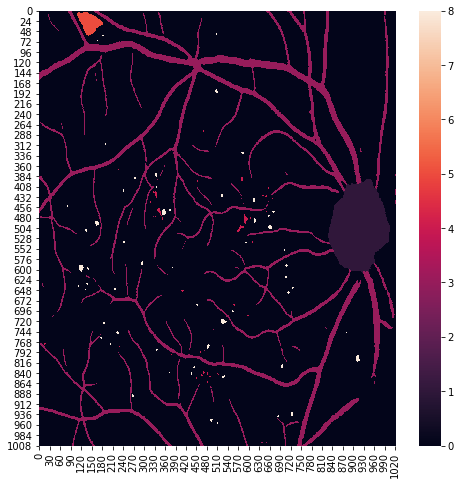

In [28]:
plt.figure(figsize=(8,8))
sb.heatmap(pred[0])
#plt.savefig('test.png')